# Sampling Non-Standard Distributions

We will learn two techniques to use the continuous uniform distribution U[0,1], to sample from other distributions.

* Transformation Method
* Accept-Reject Method

The second method is somewhat more general than the first.

We have seen a particular avataar of the accept-reject method when we tried to find the area of a circle by throwing darts.

In [3]:
# preliminaries
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 'Large'
mpl.rcParams['xtick.labelsize'] = 'Large'
mpl.rcParams['ytick.labelsize'] = 'Large'
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Transformation Method

The idea in this method is to use random numbers 
$$u_1, u_2, ..., u_n \sim g(u)= U[0,1],$$
to produce random numbers from a different PDF 
$$x_1, x_2, ... x_n \sim f(x),$$
by seeking a suitable mathematical mapping or transformation $x(u)$.


One idea to get a suitable mapping is to match the CDFs.

**Note:**
- The relationship between CDF and PDF is unique
- The mapping will depend on $f(x)$

(0, 2.1)

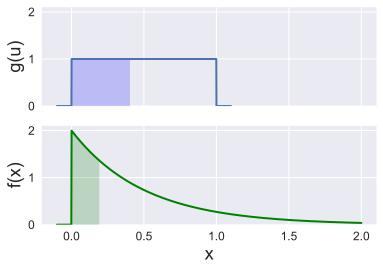

In [5]:
xi = np.linspace(-0.1,1.1,1000)
ui = np.ones(len(xi))
ui[xi < 0] = 0.; ui[xi > 1.] = 0.

fig, axarr = plt.subplots(2,1,sharex=True)

axarr[0].plot(xi,ui)
axarr[0].set_ylabel('g(u)', fontsize='18')

axarr[0].fill_between(xi[0:420], 0, ui[0:420], facecolor='blue', alpha=0.2)
axarr[0].set_ylim(0,2.1)

xi = np.linspace(-0.1,2,1000)
lam = 2.0; fexp = lam*np.exp(-lam*xi)
fexp[xi < 0] = 0.
axarr[1].plot(xi, fexp,'g-')
axarr[1].set_xlabel('x', fontsize='18')
axarr[1].set_ylabel('f(x)', fontsize='18')
axarr[1].fill_between(xi[0:140], 0, fexp[0:140], facecolor='green', alpha=0.2)
axarr[1].set_ylim(0,2.1)

In [12]:
x = np.linspace(-2,3,1000)
cexp = norm.cdf(x)
cuni = uniform.cdf(x)

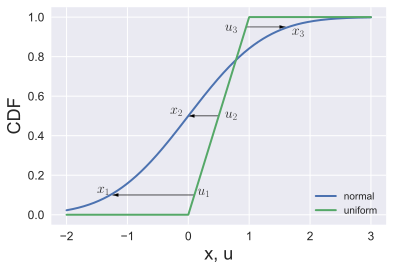

In [23]:
plt.plot(x,cexp, label='normal')
plt.plot(x,cuni, label='uniform')

plt.arrow(0.1, 0.1, -1.25, 0.0, head_width=0.015, head_length=0.1, fc='k')
plt.text(0.15, 0.09, r'$u_1$', {'size':14, 'family':'serif', 'usetex':True})
plt.text(-1.5, 0.1, r'$x_1$', {'size':14, 'family':'serif', 'usetex':True})

plt.arrow(0.5, 0.5, -0.4, 0.0, head_width=0.015, head_length=0.1, fc='k')
plt.text(0.6, 0.48, r'$u_2$', {'size':14, 'family':'serif', 'usetex':True})
plt.text(-0.3, 0.5, r'$x_2$', {'size':14, 'family':'serif', 'usetex':True})

plt.arrow(0.95, 0.95, 0.55, 0.0, head_width=0.015, head_length=0.1, fc='k')
plt.text(0.6, 0.92, r'$u_3$', {'size':14, 'family':'serif', 'usetex':True})
plt.text(1.7, 0.9, r'$x_3$', {'size':14, 'family':'serif', 'usetex':True})

plt.xlabel('x, u', fontsize=18)
plt.ylabel('CDF', fontsize=18)
plt.legend(loc='lower right')

For a somewhat intuitive graphical interpretation, consider the CDF of the target distribution.

We draw $u \sim U[0,1]$ (y-axis or plot), and use the CDF (solve $F(x)=u$) to transform it to $x$ (corresponding point on the x-axis).

The condition we impose is: $$\text{Pr}(u'\leq u) = \text{Pr}\left(x' \leq x(u)\right).$$

Thus, $$\int_{-\infty}^{u} g(u') du' = \int_{-\infty}^{x(u)} f(x') dx'$$
Or, $u = F(x(u))$, where $F(x)$ is the CDF corresponding to $f(x)$.

Thus, we set $F(x) = u$. If it is possible to solve for $x$ in terms of $u$, then we are in business!

In essence, the success of this method hinges on our ability to explicity solve for $x = F^{-1}(u)$.


The domain of $U[0, 1]$ matches the range of the CDF (0-1).
- draw $u \sim U[0, 1]$,
- use the CDF (solve $F(x) = u)$ to get $x$

(0.0, 1.0)

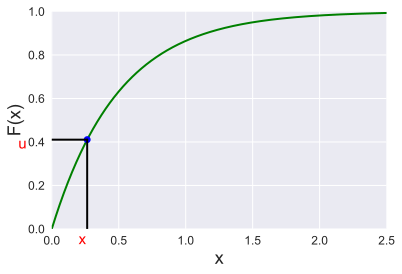

In [26]:
xi = np.linspace(-0.1,2.5,1000)
lam = 2.0; Fexp = 1 - np.exp(-lam*xi)
Fexp[xi < 0] = 0.
plt.plot(xi, Fexp,'g-')
plt.plot(xi[140],Fexp[140],'bo')
plt.plot([xi[140], xi[140]],[0., Fexp[140]],'k-')
plt.plot([0., xi[140]],[Fexp[140], Fexp[140]],'k-')
xp = xi[120]
plt.xlabel('x', fontsize='18')
plt.ylabel('F(x)', fontsize='18')
plt.xlim(0., 2.5)
plt.text(-0.25, 0.37, 'u', color='red', fontsize=15)
plt.text(0.2, -0.07, 'x', color='red', fontsize=15)
plt.ylim(0.,1.0)

This is equivalent to flipping the graph below on its side.

Text(-0.05,0.23,'x')

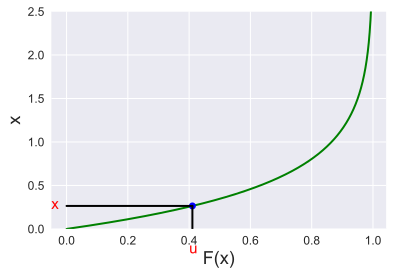

In [28]:
plt.plot(Fexp, xi,'g-')
plt.plot(Fexp[140],xi[140],'bo')
plt.plot([0., Fexp[140]], [xi[140], xi[140]],'k-')
plt.plot([Fexp[140], Fexp[140]], [0., xi[140]],'k-')
xp = xi[120]
plt.ylabel('x', fontsize='18')
plt.xlabel('F(x)', fontsize='18')
plt.ylim(0., 2.5)
plt.text(0.4, -0.28, 'u', color='red', fontsize=15)
plt.text(-0.05, 0.23, 'x', color='red', fontsize=15)

If we can analytically solve $x = F^{−1}(u)$, this is likely our best option.

An alternative may be to use some sort of piecewise curve (line, cubic, spline) to fit the $F(x)$, and then use interpolation to generate the random deviates.

In general, we could use a nonlinear solver to solve $F(x)=u$, but that may involve too much overhead.

*Example*: Suppose we want to produce random numbers from the exponential distribution $$f(x; \lambda) = \lambda \exp(-\lambda x), ~~~x>0.$$

From the transformation method:

\begin{align}
u &= F(x)\\
 &= \int_{0}^{x} \lambda \exp(-\lambda X) dX \\
  &= 1 - e^{-\lambda x}.
\end{align}

Thus $$x = \frac{-\ln(1 - u)}{\lambda}.$$

Let us try to write a program this implements this transformation

In [29]:
def myExponentialSampler(lam, num):
    """Generate -num- exponentially distributed samples"""
    u = np.random.random((num,1))
    x = -np.log(1-u)/lam
    return x

Suppose $\lambda = 2$. Generate 5000 numbers and histogram them. The blue line is the actual distribution $2 \exp(−2x)$

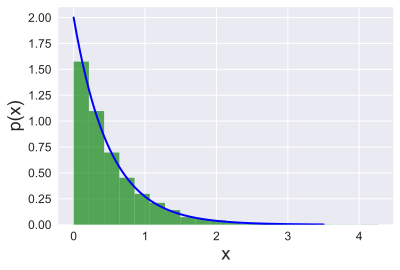

In [30]:
x = myExponentialSampler(2.0, 5000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.65)
plt.xlabel('x', fontsize='18')
plt.ylabel('p(x)', fontsize='18')

xi = np.linspace(0.0,3.5,1000)
lam = 2.0; fexp = lam*np.exp(-lam*xi)
plt.plot(xi, fexp, 'b-')

*Exercise 1*: Write a program to sample from the Weibull distribution, which has parameters $\lambda>0$ and $k>0$, given by:

$$f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0.
\end{cases}$$

*Hint*: It has a CDF given by:

$$F(x; \lambda,k) = \begin{cases}1- e^{-(x/\lambda)^k} & x\geq0\\ 0 & x<0\end{cases}$$

*Exercise 2*: How would you sample from a discrete distribution, such as a roll of a die or a toss of a coin?

*Exercise 3*: Write a program to sample from $U[a, b]$.

### Advantages and Disadvantages:

* (-) requires a closed form expression for $F(x)$, or potentially costly numerics
* (-) may not be simplest or fastest for a particular target distribution (example Gaussian distribution)
* (-) can become unworkable for non-standard multidimensional PDFs
* (+) generally works quite fast
* (+) works for any monotonically increasing $F(x)$ (could be flat in some regions)
* (+) can be used for continuous, discrete, or mixed continuous-discrete (multidimensional)

## Accept-Reject Method

The idea is to enclose the distribution in an appropriate box, and throw darts at it. Does this sound familiar?

We already used this technique to compute integrals (which as we've now learnt) can be thought of as a subset of the larger sampling problem, from a Monte Carlo perspective.

(0, 0.6)

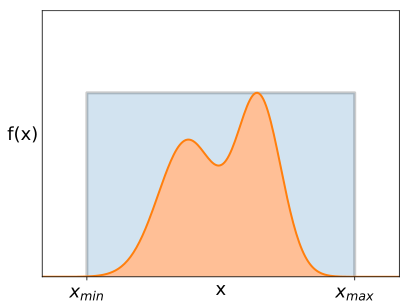

In [35]:
from scipy import stats
x_range = np.linspace(-10, 10, 300)
n1 = stats.norm(-1.5, 1.3)
n2 = stats.norm(1.7, 1)

n3 = n1.pdf(x_range) + n2.pdf(x_range)
plt.style.use('default')
plt.rc('font', size=18)
plt.plot(x_range, n3, lw=2, color='#ff7f0e', zorder=1)
plt.fill_between(x_range, n3,color=(1., .75, .59),zorder=1)

plt.gca().add_patch(
    mpl.patches.PathPatch(
        mpl.path.Path([(-6, 0), 
                       (-6, max(n3)),
                       (6, max(n3)),
                       (6, 0)]),
        alpha=.2, lw=3, zorder=0
    )
)

plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_major_locator(plt.FixedLocator((-6, 6)))
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter((r'$x_{min}$',r'$x_{max}$')))

plt.ylabel('f(x)', {
       'fontsize'            : 18,
       'horizontalalignment' : 'right',
       'rotation'            :'horizontal'  }
          )
plt.xlabel('x', fontsize=18, labelpad=-20)
plt.xlim(-8, 8)
plt.ylim(0, .6)

Suppose the distribution $f(x)$ is contained within $x_{min} \leq x \leq x_{max}$. We draw a box of height $f_{max}$ which fully encloses the distribution. The algorithm then works as follows:

* Generate a random number $x \sim U[x_{min}, x_{max}]$
* Generate a 2nd independent random number $u \sim U[0, f_{max}]$
* If $u < f(x)$, then accept x. If not, reject x and repeat.

Example: Consider the distribtion,

$$f(x) = \frac{3}{8} (1+x^2), ~~~ -1 \leq x \leq 1$$

If we plot the function, we realize that the maximum value occurs at $x = 1$, thus $f_{max} = 3/4$

In [6]:
def acceptRejectExample(ndarts):
    xmin = -1.
    xmax = 1.
    fmax = 3./4
    
    x = np.random.uniform(xmin, xmax, ndarts)
    u = np.random.uniform(0., fmax, ndarts)
    
    y = x[u < 3./8. * (1 + x**2)]
    
    xi = np.linspace(-1,1); fi = 3./8. * (1 + xi**2)
    plt.plot(xi, fi,'b-', lw=3)
    plt.plot(y,u[u < 3./8. * (1 + x**2)],'r.')
    plt.plot(x[u > 3./8. * (1 + x**2)],u[u > 3./8. * (1 + x**2)],'g.')
    
    return y

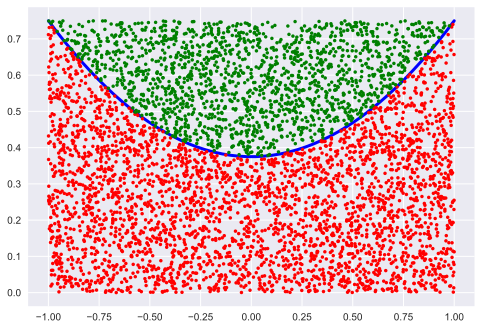

In [7]:
plt.style.use('seaborn')
x = acceptRejectExample(5000)

Text(0,0.5,'f(x)')

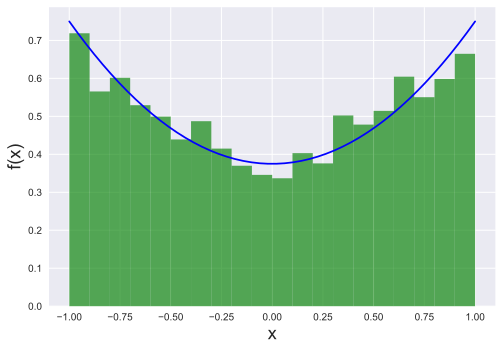

In [8]:
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.65)
xi = np.linspace(-1,1); fi = 3./8. * (1 + xi**2)
plt.plot(xi, fi,'b-')
plt.xlabel('x', fontsize='18')
plt.ylabel('f(x)', fontsize='18')

This is a more general method that can be applied in more than 1D.

* The target distribution need not be invertible
* If the distribution is sharply peaked we may draw multiple boxes of different heights to reduce rejection
* even if the domain is infinite, the computational domain (double precision floating point numbers for example) is not infinite

*Adaptive rejection sampling* tries to ameliorate some of the demerits of this method by

* defining the envelope distribution in log space (e.g. log-probability or log-density)
* use a piecewise linear density function as your envelope (which is adapted as the sampling is carried on)

(0, 0.6)

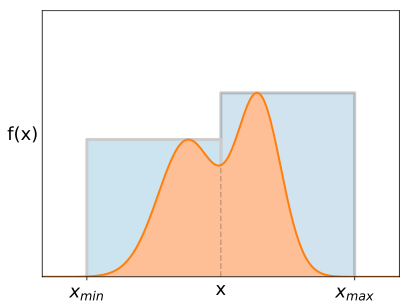

In [39]:
plt.style.use('default')
plt.rc('font', size=18)
plt.plot(x_range, n3, lw=2, color='#ff7f0e', zorder=1)
plt.fill_between(x_range, n3,color=(1., .75, .59),zorder=1)

plt.gca().add_patch(
    mpl.patches.PathPatch(
        mpl.path.Path([(0, 0), 
                       (0, max(n3)),
                       (6, max(n3)),
                       (6, 0)]),
        alpha=.2, lw=3, zorder=0
    )
)

plt.gca().add_patch(
    mpl.patches.PathPatch(
        mpl.path.Path([(-6, 0), 
                       (-6, max(n3[x_range < 0])),
                       (0, max(n3[x_range < 0])),
                       (0, 0)]),
        edgecolor=(.8,.8,.8), lw=3, zorder=0, facecolor=(0.8,.89, .94)
    )
)

plt.vlines(0, 0,n1.pdf(0) + n2.pdf(0) , linestyle='dashed', alpha=.2)

plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_major_locator(plt.FixedLocator((-6, 6)))
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter((r'$x_{min}$',r'$x_{max}$')))

plt.ylabel('f(x)', {
       'fontsize'            : 18,
       'horizontalalignment' : 'right',
       'rotation'            :'horizontal'  }
          )
plt.xlabel('x', fontsize=18, labelpad=-20)
plt.xlim(-8, 8)
plt.ylim(0, .6)

## PostFace

For 1D sampling, one of these two methods should generally suffice.

As the number of dimensions increases:

* the **transformation method** gets increasingly hard to apply, even if we use numerical rather than analytical inversion
* the number of rejections in the **accept-reject method** increases rapidly

Even sophisticated variants of these simple algorithms can no longer cope with this complexity

Next, we will look at 2D distributions, as a window into these higher dimensional spaces. As the dimensionality increases, MCMC - which are not particularly competitive in these low dimensional spaces - start to shine!